<a href="https://colab.research.google.com/github/skywalker0803r/Job-OEM/blob/main/coffee_maker_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from sklearn import svm
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, recall_score, precision_score, f1_score, roc_curve, auc, precision_recall_curve

In [17]:
df = pd.read_csv('/content/drive/MyDrive/作業代工/coffee-maker-classification/coffee_maker.csv')
df

,review_date,handle,rating,helpfulness_rating,review
0,"April 14, 2018",The Dolphin,2.0,513,Delightful coffee maker if you’re only looking...
1,"February 7, 2019",Karen Kaffenberger,1.0,122,UPDATE: Bought this 10-21-18 and I finally ret...
2,"December 23, 2017",C1C3C11,4.0,185,The big reason I ordered this was because I wa...
3,"November 26, 2016",Paul Roberts,5.0,224,I've owned several of their older brewstation ...
4,"November 28, 2017",JennyD,3.0,116,I agonized over which coffee maker to purchase...
...,...,...,...,...,...
4995,"February 4, 2014",shashi,5.0,NaN,Our Mr. Coffee machine stopped working one day...
4996,"May 2, 2019",Connie Krusi,1.0,NaN,This is the second generation of this product ...
4997,"August 28, 2014",KL,5.0,NaN,Wow works great and bought it for a bargain wi...
4998,"December 16, 2019",Nancy,2.0,NaN,Doesn’t brew correctly need to start to get al...


In [18]:
# Ratings 1-3 -> negative sentiment. Ratings 4-5 -> positive sentiment
df['label'] = df.apply(lambda row: row.rating>3.0,axis=1)
df['label'] = df['label'].astype(int)
df.head()

,review_date,handle,rating,helpfulness_rating,review,label
0,"April 14, 2018",The Dolphin,2.0,513,Delightful coffee maker if you’re only looking...,0
1,"February 7, 2019",Karen Kaffenberger,1.0,122,UPDATE: Bought this 10-21-18 and I finally ret...,0
2,"December 23, 2017",C1C3C11,4.0,185,The big reason I ordered this was because I wa...,1
3,"November 26, 2016",Paul Roberts,5.0,224,I've owned several of their older brewstation ...,1
4,"November 28, 2017",JennyD,3.0,116,I agonized over which coffee maker to purchase...,0


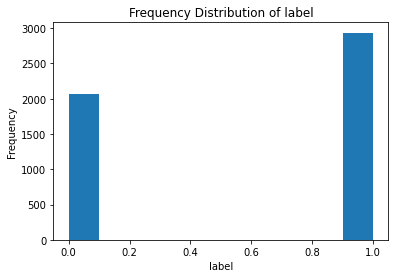

In [19]:
# Assessing label class distribution
import matplotlib.pyplot as plt

plt.hist(df['label'])
plt.gca().set(title = 'Frequency Distribution of label',ylabel='Frequency',xlabel='label')
plt.show()

In [20]:
df['review'] = df['review'].astype(str).apply(lambda x:x.lower())
df.head()

,review_date,handle,rating,helpfulness_rating,review,label
0,"April 14, 2018",The Dolphin,2.0,513,delightful coffee maker if you’re only looking...,0
1,"February 7, 2019",Karen Kaffenberger,1.0,122,update: bought this 10-21-18 and i finally ret...,0
2,"December 23, 2017",C1C3C11,4.0,185,the big reason i ordered this was because i wa...,1
3,"November 26, 2016",Paul Roberts,5.0,224,i've owned several of their older brewstation ...,1
4,"November 28, 2017",JennyD,3.0,116,i agonized over which coffee maker to purchase...,0


# train/test split

In [21]:
from sklearn.model_selection import train_test_split
X = df['review']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=14)
X_train.shape,X_test.shape, y_train.shape, y_test.shape

((3500,), (1500,), (3500,), (1500,))

In [22]:
m = TfidfVectorizer()
m.fit(X_train,y_train)
m.transform(X_test).toarray().shape

(1500, 6274)

# LogisticRegression

In [23]:
lr= LogisticRegression()
pipe = Pipeline([
            ('tfidf', TfidfVectorizer()), 
            ('Logistic Regression',lr),
            ])

pipe.fit(X_train,y_train)
pred = pipe.predict(X_test)
pred_prob = pipe.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, pred_prob)
precision, recall, thresholds_pr = precision_recall_curve(y_test, pred)

print("_________Logistic Regression Model_________")
print(classification_report(y_test, pred))
print('ROC AUC: ', auc(fpr, tpr))
print('Precision/Recall AUC: ', auc(precision, recall))

_________Logistic Regression Model_________
              precision    recall  f1-score   support

           0       0.87      0.84      0.86       622
           1       0.89      0.91      0.90       878

    accuracy                           0.88      1500
   macro avg       0.88      0.88      0.88      1500
weighted avg       0.88      0.88      0.88      1500

ROC AUC:  0.9460105545342015
Precision/Recall AUC:  0.34227537332320923


# SVM

In [24]:
model = svm.SVC(probability=True)

pipe = Pipeline([
            ('tfidf', TfidfVectorizer()), 
            ('SVM',model),
            ])

pipe.fit(X_train,y_train)
pred = pipe.predict(X_test)
pred_prob = pipe.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, pred_prob)
precision, recall, thresholds_pr = precision_recall_curve(y_test, pred)

print("_________SVM_________")
print(classification_report(y_test, pred))
print('ROC AUC: ', auc(fpr, tpr))
print('Precision/Recall AUC: ', auc(precision, recall))

_________SVM_________
              precision    recall  f1-score   support

           0       0.88      0.87      0.87       622
           1       0.91      0.91      0.91       878

    accuracy                           0.90      1500
   macro avg       0.89      0.89      0.89      1500
weighted avg       0.90      0.90      0.90      1500

ROC AUC:  0.9498522291967275
Precision/Recall AUC:  0.35062827690050574


# XGB

In [25]:
model = XGBClassifier()

pipe = Pipeline([
            ('tfidf', TfidfVectorizer()), 
            ('XGB',model),
            ])

pipe.fit(X_train,y_train)
pred = pipe.predict(X_test)
pred_prob = pipe.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, pred_prob)
precision, recall, thresholds_pr = precision_recall_curve(y_test, pred)

print("_________XGB_________")
print(classification_report(y_test, pred))
print('ROC AUC: ', auc(fpr, tpr))
print('Precision/Recall AUC: ', auc(precision, recall))

_________XGB_________
              precision    recall  f1-score   support

           0       0.84      0.75      0.79       622
           1       0.83      0.90      0.87       878

    accuracy                           0.84      1500
   macro avg       0.84      0.82      0.83      1500
weighted avg       0.84      0.84      0.83      1500

ROC AUC:  0.9099596056515465
Precision/Recall AUC:  0.3108767259305843


# ANN

In [26]:
mlp = MLPClassifier(alpha=1, max_iter=1000)


pipe = Pipeline([
            ('tfidf', TfidfVectorizer()), 
            ('ANN',mlp),
            ])

pipe.fit(X_train,y_train)
pred = pipe.predict(X_test)
pred_prob = pipe.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, pred_prob)
precision, recall, thresholds_pr = precision_recall_curve(y_test, pred)

print("_________ ANN _________")
print(classification_report(y_test, pred))
print('ROC AUC: ', auc(fpr, tpr))
print('Precision/Recall AUC: ', auc(precision, recall))

_________ ANN _________
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       622
           1       0.91      0.91      0.91       878

    accuracy                           0.89      1500
   macro avg       0.89      0.89      0.89      1500
weighted avg       0.89      0.89      0.89      1500

ROC AUC:  0.9479643518959341
Precision/Recall AUC:  0.3499886622489128


# Answer


# 3.what approch you took

We regard the rating rating Ratings 1-3 -> negative sentiment. Ratings 4-5 -> positive sentiment as a classification problem
We use TFIDF to convert text data into vectors
Then split the data into training/testing sets
Doing this allows the supervised model to learn

# 4.what are you result?

We observe the results using
precision, recall, f1-score and ROC AUC, Precision/Recall AUC

# 5.How do you result compare?

According to classification_report
Logistic regression, SVM, and ANN are almost as good, the best of which is SVM, and XGB performs relatively poorly

# 6 what are work well? what not so well?


SVM work well XGB not so well